***Participantes (RM - NOME):***<br>
Vitor Luiz Carvalhal - 337129<br>
Ricardo Fabbro Antonelli - 339505<br>
Bartira Lira Lafiandre - 340177<br>
Tiago Batista Pessoa - 339575<br>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sbs
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib
import plotly.io as pio
pio.renderers.default = "vscode"
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.linear_model import LinearRegression as lr
from sklearn import metrics as me
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
#necessita do pydot pip install pydot
from keras.utils.vis_utils import plot_model

In [28]:
#recupera os dados da planilha origem apenas para coletar o nome dos campos
filename= "./data/datasetclusterizado.csv"
file= pd.read_csv(filename,sep="\t",decimal='.', engine='python')
file = file.reindex(sorted(file.columns), axis=1)
file.drop(file.columns[0],inplace=True,axis=1)
#file.drop(["cluster"],inplace=True,axis=1)
file.head()

,ativoCirculante,capitalSocial,cluster,custos,dashboardCorrelacao,definicaoRisco,empresa_MeEppMei,endividamento,estoque,faturamentoBruto,...,margemBrutaAcumulada,passivoCirculante,percentualProtestos,prazoMedioRecebimentoVendas,restricoes,scorePontualidade,titulosEmAberto,totalPatrimonioLiquido,valorAprovado,valorSolicitado
0,14758917.0,75000.0,0,40680051.0,0.000000,2,False,3039112.0,3047791.0,40779757.0,...,0.454088,12149031.0,0.0,20,False,1.0,1486.95,14544378.0,50000.0,50000.0
1,14758917.0,15000.0,2,0.0,0.000000,3,True,3039112.0,3047791.0,918476.0,...,0.000000,12149031.0,0.0,0,False,0.0,0.00,14544378.0,20000.0,25000.0
2,14758917.0,30515674.0,3,156394112.0,-0.997517,3,False,3039112.0,3047791.0,239016696.0,...,0.000000,12149031.0,0.0,0,True,0.0,0.00,14544378.0,80000.0,100000.0
3,17801610.0,120000.0,0,0.0,0.000000,1,False,0.0,11902384.0,11958227.0,...,0.350175,2538069.0,0.0,102,False,1.0,208980.00,7519758.0,300000.0,300000.0
4,36827690.0,1000000.0,0,-49267738.0,0.000000,2,False,0.0,11420388.0,72479551.0,...,0.245818,13843198.0,0.0,27,False,1.0,6432.00,25612746.0,400000.0,400000.0


AxesSubplot(0.125,0.3515;0.775x0.5285) 



Text(0.5, 1.0, 'Correlation matrix')

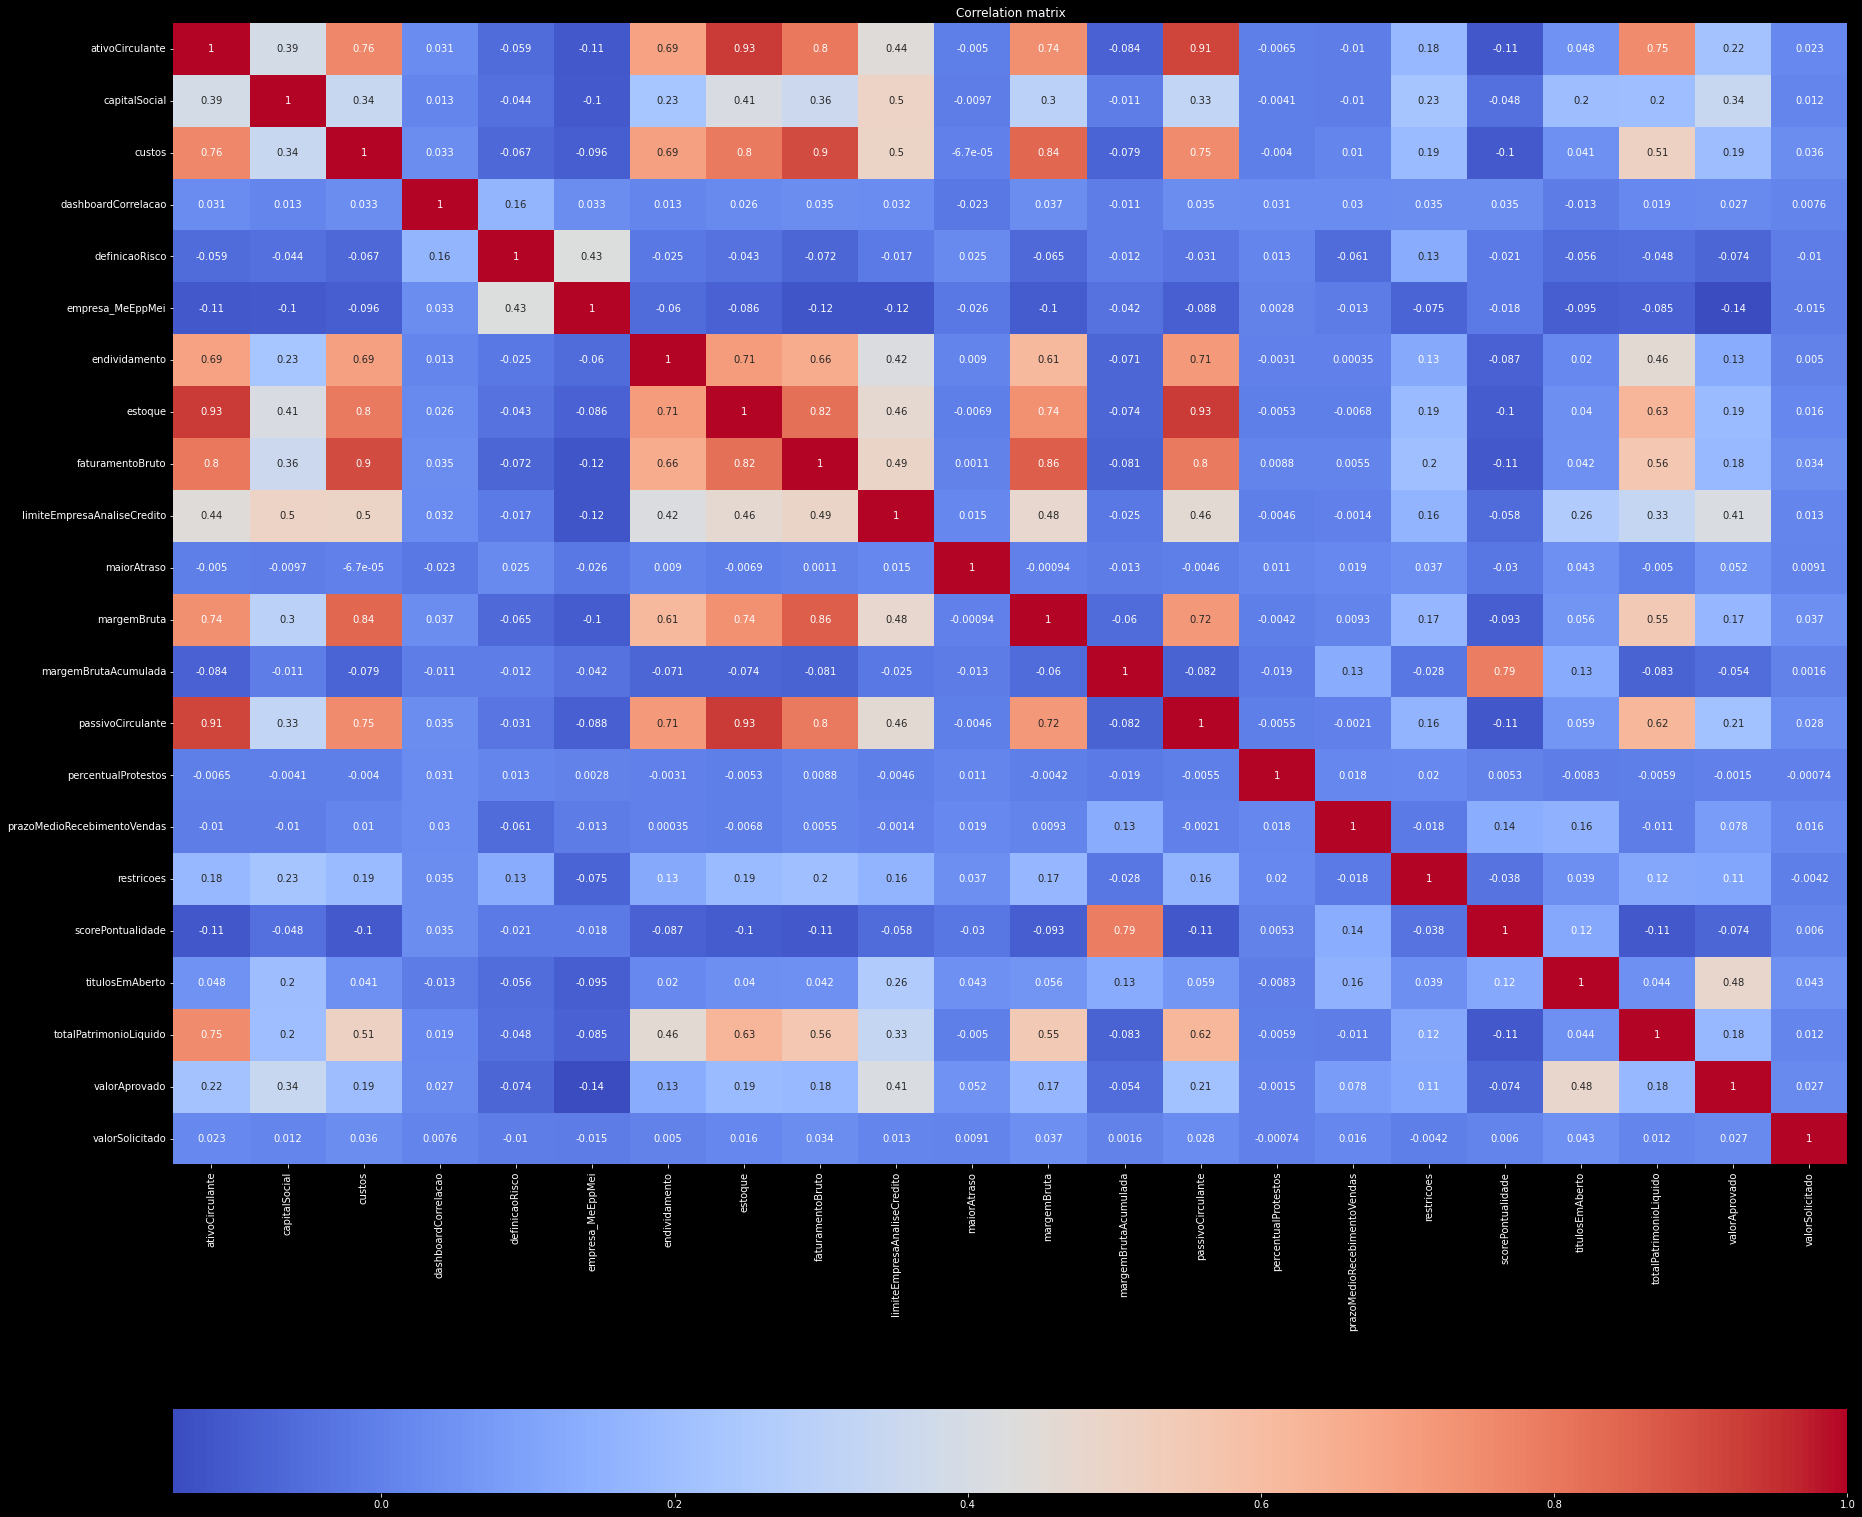

In [8]:
plt.figure(figsize=(30,30)) 
print(sbs.heatmap(file.corr(), annot=True, cmap="coolwarm",cbar_kws= {'orientation': 'horizontal'}),"\n")
plt.title('Correlation matrix')

<AxesSubplot:>

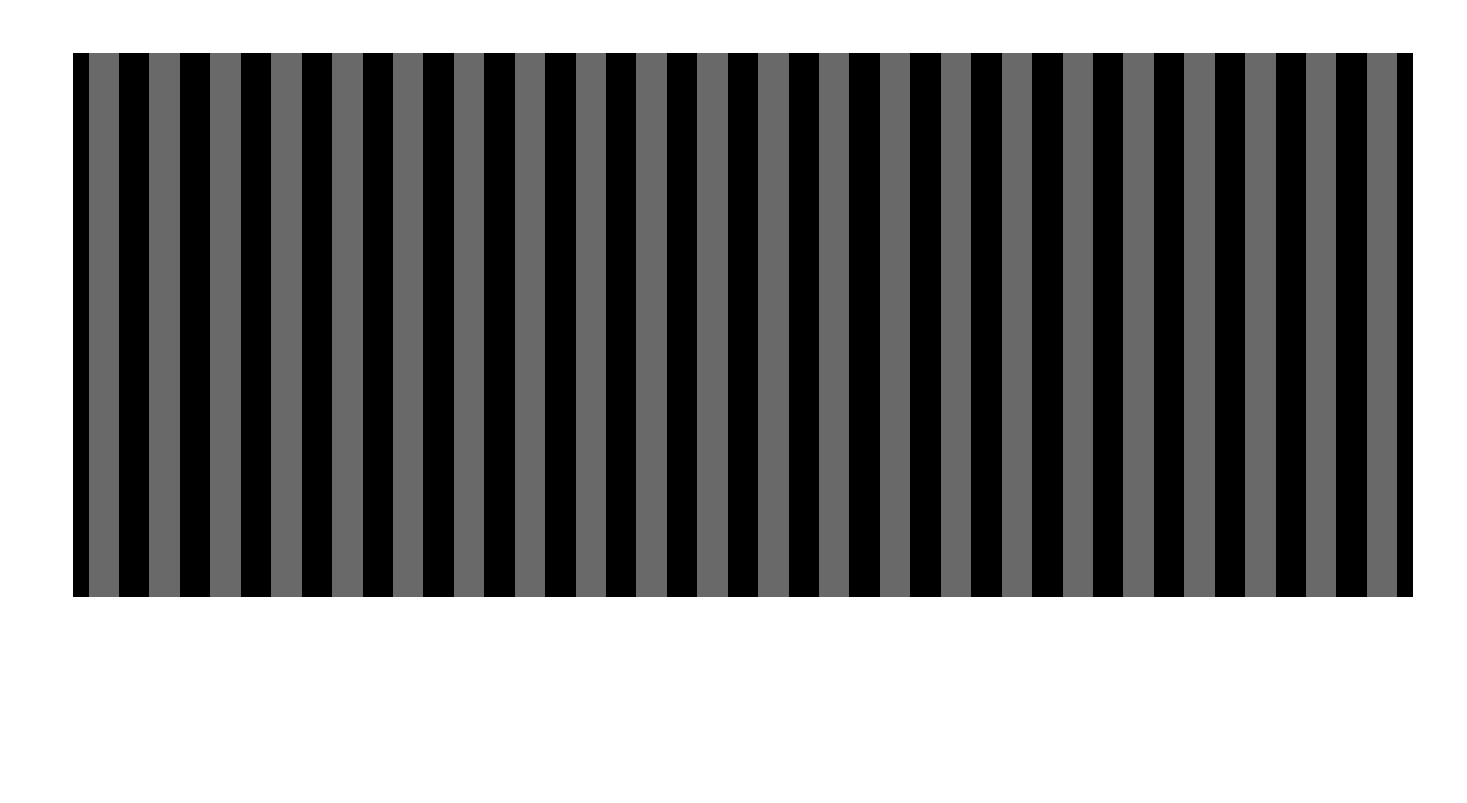

In [26]:
%matplotlib inline
msno.bar(file)

In [9]:
print(round(file.corr(method='pearson')["valorAprovado"]*100,2).sort_values(ascending=False),'\n')

valorAprovado                  100.00
titulosEmAberto                 47.85
limiteEmpresaAnaliseCredito     41.17
capitalSocial                   34.37
ativoCirculante                 21.90
passivoCirculante               21.17
custos                          19.34
estoque                         18.63
faturamentoBruto                18.31
totalPatrimonioLiquido          17.74
margemBruta                     17.05
endividamento                   13.34
restricoes                      11.14
prazoMedioRecebimentoVendas      7.78
maiorAtraso                      5.24
dashboardCorrelacao              2.70
valorSolicitado                  2.69
percentualProtestos             -0.15
margemBrutaAcumulada            -5.36
scorePontualidade               -7.39
definicaoRisco                  -7.42
empresa_MeEppMei               -14.18
Name: valorAprovado, dtype: float64 



In [35]:
cluster1 = file[file["cluster"]==1]
cluster1.shape

(2500, 23)

In [36]:
cluster2 = file[file["cluster"]==2]
cluster2.shape

(619, 23)

In [37]:
cluster3 = file[file["cluster"]==3]
cluster3.shape

(898, 23)

In [38]:
cluster4 = file[file["cluster"]==4]
cluster4.shape

(644, 23)

### **cluster 0**

In [34]:
cluster0 = file[file["cluster"]==0]
cluster0.shape

(3846, 23)

In [47]:
targetcol = 'valorAprovado'
y_0 = cluster0[targetcol]
x_0 = cluster0.iloc[:, cluster0.columns != 'valorAprovado']

#X_norm = StandardScaler().fit_transform(x)

#clf = rfr()
#clf.fit(X=X_norm, y=y)
#clf.all_coln = all_coln

In [50]:
from sklearn.model_selection import train_test_split

X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(x_0, y_0, test_size = 0.25, random_state = 0)

> Fazendo RandonForestRegression

In [51]:
clf = rfr(n_estimators = 50, random_state = 0)
clf.fit(X_0_train, y_0_train)

clf_acuracia = clf.score(X=x_0, y=y_0)
print("Acuracia (r²): [{0}]".format(clf_acuracia))

Acuracia (r²): [0.9298851851046059]


In [52]:
y_pred = clf.predict(X_0_test)

print('Mean Absolute Error(MAE):', me.mean_absolute_error(y_0_test, y_pred))  
print('Mean Squared Error(MSE):', me.mean_squared_error(y_0_test, y_pred))  
print('Root Mean Squared Error(RMSE):', np.sqrt(me.mean_squared_error(y_0_test, y_pred)))

Mean Absolute Error(MAE): 58512.185367785365
Mean Squared Error(MSE): 38188295828.73478
Root Mean Squared Error(RMSE): 195418.25868821668


> Fazendo linearRegression

In [54]:
lrl = lr()
lrl.fit(X_0_train, y_0_train)

lrl_acuracia = lrl.score(X=x_0, y=y_0)
print("Acuracia (r²): [{0}]".format(lrl_acuracia))

Acuracia (r²): [0.5199696900469666]


In [56]:
y_pred_linear = lrl.predict(X_test)

print('Mean Absolute Error(MAE):', me.mean_absolute_error(y_0_test, y_pred_linear))  
print('Mean Squared Error(MSE):', me.mean_squared_error(y_0_test, y_pred_linear))  
print('Root Mean Squared Error(RMSE):', np.sqrt(me.mean_squared_error(y_0_test, y_pred_linear)))

Mean Absolute Error(MAE): 148065.4542939091
Mean Squared Error(MSE): 115676747573.68068
Root Mean Squared Error(RMSE): 340112.8453523634


> usando MLP

In [57]:
seed = 7
test_size = 0.30

scalar = MinMaxScaler()
X = scalar.fit_transform(x_0)

X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X, y_0, test_size=test_size, random_state=seed)

In [58]:
qtd_features = len(X[0,:])
qtd_amostras = len(X[:,0])

model = Sequential()
model.add(Dense(12, input_dim=qtd_features, activation='relu'))
model.add(Dense(12, activation='relu'))
#Adiciona uma camada de saída sem função de ativação fazendo a apenas a multiplicação das caracteristicas x pesos
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam', metrics=['mae', 'mse'])

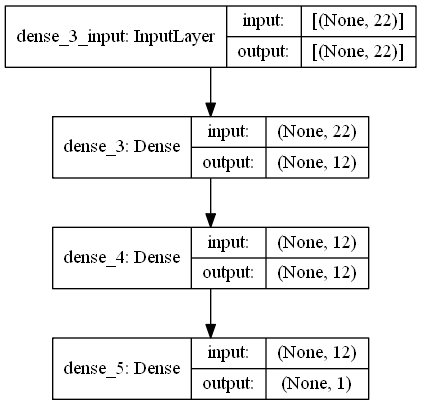

In [59]:
plot_model(model, to_file='mlp-seq.png', show_shapes=True, show_layer_names=True)


In [60]:
model.fit(X_0_train, y_0_train, epochs=300, batch_size=4)

Epoch 1/300
673/673 [==============================] - 1s 573us/step - loss: 244662894592.0000 - mae: 184071.5938 - mse: 244662894592.0000
Epoch 2/300
673/673 [==============================] - 0s 602us/step - loss: 244583710720.0000 - mae: 183864.6094 - mse: 244583710720.0000
Epoch 3/300
673/673 [==============================] - 0s 573us/step - loss: 244331380736.0000 - mae: 183220.7031 - mse: 244331380736.0000
Epoch 4/300
673/673 [==============================] - 0s 621us/step - loss: 243878952960.0000 - mae: 182015.7344 - mse: 243878952960.0000
Epoch 5/300
673/673 [==============================] - 0s 596us/step - loss: 243181535232.0000 - mae: 180188.5781 - mse: 243181535232.0000
Epoch 6/300
673/673 [==============================] - 0s 570us/step - loss: 242212896768.0000 - mae: 177816.8750 - mse: 242212896768.0000
Epoch 7/300
673/673 [==============================] - 0s 588us/step - loss: 240997826560.0000 - mae: 174948.2344 - mse: 240997826560.0000
Epoch 8/300
673/673 [======

In [61]:
y_pred_MLP = model.predict(X_0_test)

In [62]:
print('Mean Absolute Error(MAE):', me.mean_absolute_error(y_0_test, y_pred_MLP))  
print('Mean Squared Error(MSE):', me.mean_squared_error(y_0_test, y_pred_MLP))  
print('Root Mean Squared Error(RMSE):', np.sqrt(me.mean_squared_error(y_0_test, y_pred_MLP)))

Mean Absolute Error(MAE): 167766.71073478213
Mean Squared Error(MSE): 132771907009.19096
Root Mean Squared Error(RMSE): 364378.79604772694


In [34]:
model_name = "indicacao_valor_maximo.pkl"
filename = "./modelo/" + model_name
joblib.dump(value=clf, filename=filename)

['./modelo/indicacao_valor_maximo.pkl']